In [ ]:
#To upload files in this colab and than using it.

import pandas as pd
from google.colab import files
uploaded = files.upload()

In [ ]:
# uploading data from colab into this variable.

import pandas as pd
import io
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [ ]:
# best way to use big dataset is to upload it into google drive.
# mount your google drive from the side button option of google drive
# Enter the path and upload the dataframe in to colab sheet


import pandas as pd
train = pd.read_csv('/content/drive/My Drive/Fake news classifier dataset/train.csv')
train


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
len(train)

20800

In [ ]:
#after dropping NA values we have 18285 dataset left.
train_no_na = train.dropna()

# dropped na values are stored here for future use.

drop_na_rows = train[~train.index.isin(train_no_na.index)]


print(len(train), len(train_no_na), len(drop_na_rows))


20800 18285 2515


0    10361
1     7924
Name: label, dtype: int64
percentage of 0 - Real news is  56.66393218485097
percentage of 1 - Fake news is  43.33606781514903


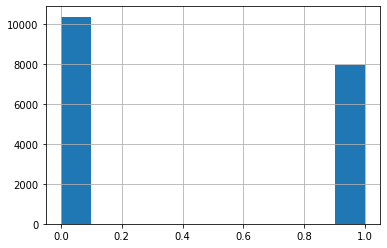

In [ ]:
#quantity of dataset labels is 



train_no_na['label'].hist()

print(train_no_na.label.value_counts())
Real_news_percent = train_no_na.label.value_counts()[0]/len(train_no_na) * 100
fake_news = 100-Real_news_percent

print('percentage of 0 - Real news is ', Real_news_percent )
print('percentage of 1 - Fake news is ', fake_news)


In [ ]:
###  Conclusion No - 1 ###

####     MOstly unreliable data which is labelled as 1 is not having any author. ####
####      Means misssing values of author column mostly has fakes news.     ####


train[train.author.isnull()].label.value_counts()


1    1931
0      26
Name: label, dtype: int64

In [ ]:
train_no_na.head(6)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0


In [ ]:
#remvoing NA values directly

train = train.dropna()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
#size of vocabulary used.

voc_size = 10000


In [ ]:
#seperating independent and dependent variables

X = train.iloc[:,1:-1]

y = train.iloc[:,-1]
print(X, y)
X.head(4)

                                                   title  ...                                               text
0      House Dem Aide: We Didn’t Even See Comey’s Let...  ...  House Dem Aide: We Didn’t Even See Comey’s Let...
1      FLYNN: Hillary Clinton, Big Woman on Campus - ...  ...  Ever get the feeling your life circles the rou...
2                      Why the Truth Might Get You Fired  ...  Why the Truth Might Get You Fired October 29, ...
3      15 Civilians Killed In Single US Airstrike Hav...  ...  Videos 15 Civilians Killed In Single US Airstr...
4      Iranian woman jailed for fictional unpublished...  ...  Print \nAn Iranian woman has been sentenced to...
...                                                  ...  ...                                                ...
20795  Rapper T.I.: Trump a ’Poster Child For White S...  ...  Rapper T. I. unloaded on black celebrities who...
20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...  ...  When the Green Bay Packers lost t

,title,author,text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...


In [ ]:
#One hot representation

messages = X.copy()
messages.head(4)

#data.reset_index(inplace=True)

,title,author,text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...


In [ ]:
import nltk 
import re
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

corpus = []

for row in range(0, len(messages)):
  for columns in range(len(messages.columns)):
    print(row)
    review = re.sub('^a-zA-Z', ' ', messages.iloc[row, columns])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)





Streaming output truncated to the last 5000 lines.
16618
16619
16619
16619
16620
16620
16620
16621
16621
16621
16622
16622
16622
16623
16623
16623
16624
16624
16624
16625
16625
16625
16626
16626
16626
16627
16627
16627
16628
16628
16628
16629
16629
16629
16630
16630
16630
16631
16631
16631
16632
16632
16632
16633
16633
16633
16634
16634
16634
16635
16635
16635
16636
16636
16636
16637
16637
16637
16638
16638
16638
16639
16639
16639
16640
16640
16640
16641
16641
16641
16642
16642
16642
16643
16643
16643
16644
16644
16644
16645
16645
16645
16646
16646
16646
16647
16647
16647
16648
16648
16648
16649
16649
16649
16650
16650
16650
16651
16651
16651
16652
16652
16652
16653
16653
16653
16654
16654
16654
16655
16655
16655
16656
16656
16656
16657
16657
16657
16658
16658
16658
16659
16659
16659
16660
16660
16660
16661
16661
16661
16662
16662
16662
16663
16663
16663
16664
16664
16664
16665
16665
16665
16666
16666
16666
16667
16667
16667
16668
16668
16668
16669
16669
16669
16670
16670
16670
16671
1

In [ ]:
# #corpus[0] + " " + corpus[1]

# corpus2= []
# list1 = []
# list2 = []
# list3 = []
# list_sum = []

# count = 0
# for columns_values in corpus[0:3]:
  
#   if count == 0:
#     list1.append(columns_values)
  
#   elif count == 1 :
#     list2.append(columns_values)
#     #list1 + " " + columns_values
#   elif count ==2:
#     list3.append(columns_values)
#     #list1 + " " + columns_values
#     list_sum = list1+ " " + list2 + " " + list3

#     corpus2.append(list_sum)
#     list1.clear()
#     list2.clear()
#     list3.clear()
#     count = -1
  
#   count +=1  



# print(corpus2)
# print(list1)

In [ ]:
##this will bring all the column values together use this

corpus2 = []
col_value = str()

count = 0
for column_value in corpus[0:9000]:
  col_value = col_value + " " + column_value
  
  if count ==2:
    corpus2.append(col_value)
    count = -1
    cl_value=str()
  else : 
    pass

  count +=1


print(corpus2)
print(count)

In [ ]:
a = []
while(1):
    a.append('1')

In [ ]:
print(len(corpus2))

5


In [ ]:
 # We ahve converted into onehot encoding here
onehot_repr  = [one_hot(words, voc_size) for words in corpus]
onehot_repr[0]


[3713, 3268, 6211, 4065, 4347, 30, 3845, 5697, 4879, 8653, 5159]

In [ ]:
#to find the max length of the column for selecting padding size 

lg = []
for i in onehot_repr:
  lg.append(len(i))
print(np.argmax(lg))

52085


In [ ]:
len(onehot_repr[52085])

21002

In [ ]:
# now we will convert it into word embedding 
# Before giving data to the embedding layer we have to make sure that all the data are of same size hence we add pad_sequences

sent_len = 21002
embedded_docs = pad_sequences(onehot_repr, padding = 'post', maxlen = sent_len)
print(embedded_docs)

[[3713 3268 6211 ...    0    0    0]
 [3503 8037    0 ...    0    0    0]
 [3713 3268 6211 ...    0    0    0]
 ...
 [9502 5575 3347 ...    0    0    0]
 [5585 9248    0 ...    0    0    0]
 [5585 9248 4514 ...    0    0    0]]


In [ ]:
#When we create a model we add embedding layer at the start

embed_features = 100
model = Sequential()
model.add(Embedding(voc_size, embed_features, input_length=sent_len))
model.add(LSTM(200))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 21002, 100)        1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               240800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 1,241,001
Trainable params: 1,241,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
len(messages.columns)

NameError: ignored

In [ ]:
import numpy as np
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [ ]:
 # splitting into train and test data

 from sklearn.model_selection import train_test_split

 X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.2, random_state=42)
 

ValueError: ignored

In [ ]:
onehot_repr2 = []

for 

list

In [ ]:
onehot_repr[0:2]

[[3713, 3268, 6211, 4065, 4347, 30, 3845, 5697, 4879, 8653, 5159],
 [3503, 8037]]

In [ ]:
type(corpus[2])

str

In [ ]:
c = []
count = 0
for i in corpus[0:3]:
  if count == 0:
    c.append(i)
  elif count ==1:
    c.append(i)
    #c.extend(i)
  elif count == 2:
    c.append(i)
    c= str(' '.join(c))
    count = -1
    #c.extend(i)
  count +=1


print(c)

  

  # c.append(i)
  # print(type(i))
  # # if i ==0:



  # count +=1
  # if count ==3:
  #   count.clear()


hous dem aide: didn’t even see comey’ letter jason chaffetz tweet darrel lucu hous dem aide: didn’t even see comey’ letter jason chaffetz tweet darrel lucu octob 30, 2016 subscrib jason chaffetz stump american fork, utah ( imag courtesi michael jolley, avail creativ commons-bi license) apolog keith olbermann, doubt worst person world week–fbi director jame comey. accord hous democrat aide, look like also know second-worst person well. turn comey sent now-infam letter announc fbi look email may relat hillari clinton’ email server, rank democrat relev committe didn’t hear comey. found via tweet one republican committe chairmen. know, comey notifi republican chairmen democrat rank member hous intelligence, judiciary, oversight committe agenc review email recent discov order see contain classifi information. long letter went out, oversight committe chairman jason chaffetz set polit world ablaz tweet. fbi dir inform me, "the fbi learn exist email appear pertin investigation." case reopen — 

In [ ]:
k = 'the element is strong'
p = 'who is that'



'twho is thathwho is thatewho is that who is thatewho is thatlwho is thatewho is thatmwho is thatewho is thatnwho is thattwho is that who is thatiwho is thatswho is that who is thatswho is thattwho is thatrwho is thatowho is thatnwho is thatg'

In [ ]:
d = []
for i in corpus[0:6]:
  d.append(i)
print(len(d))
  # print(i)

6


In [ ]:
l = ['jo', 'ko', 'mo']
s = str(' '.join(l))
print(s)

jo ko mo


In [ ]:
s

'jo ko mo'

In [ ]:
## Vocabulary size

voc_size = 5000


#seperating independent and dependent variables of training data

X = train.drop('label', axis = 1)
y = train['label']

In [ ]:
## making a copy of data for onehot encoding
messages = X.copy()

In [ ]:
#as we did dropna due to which changes occur in index of data

messages.reset_index(inplace= True)

In [ ]:
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# data preprocessing

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

corpus = []

for i in range(0, len(messages)):
  print(i)
  review = re.sub('[^a-zA-Z]', ' ', messages['title'][i] )
  review = review.lower()
  review = review.split()

  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

Streaming output truncated to the last 5000 lines.
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
13443
1

In [ ]:
corpus[23]

'humili hillari tri hide camera caught min ralli'

In [ ]:
#one hot representation

from tensorflow.keras.preprocessing.text import one_hot 
onehot_repr = [one_hot(words, voc_size) for words in corpus]
print(onehot_repr)

[[1590, 3958, 1666, 93, 2841, 786, 2763, 1640, 696, 4508], [1849, 2463, 411, 3989, 1848, 2246, 291], [3431, 4164, 3581, 4355], [4069, 3898, 4161, 1953, 4080, 3532], [1431, 1848, 2361, 3552, 2702, 4709, 1848, 3749, 4579, 2608], [3902, 2118, 2382, 153, 3350, 2561, 2859, 2085, 2984, 1945, 2097, 3910, 4864, 1611, 291], [2183, 4444, 2881, 1573, 197, 4746, 4547, 1191, 3891, 4922, 72], [1822, 3776, 2164, 3481, 4596, 4095, 2561, 3308, 3891, 4922, 72], [3665, 4202, 2270, 2256, 4642, 3220, 3167, 3174, 2561, 133], [2414, 993, 889, 4465, 2722, 3468, 265, 4664], [2280, 3028, 3887, 100, 3185, 4621, 850, 4716, 3141, 3933, 4310], [1953, 1101, 2841, 3220, 2561, 4596], [4719, 1502, 3709, 2653, 3202, 4324, 3769, 1138, 3210], [1078, 3098, 1716, 357, 1642, 1390, 4480, 3891, 4922, 72], [1908, 175, 640, 828, 1124, 3891, 4922, 72], [933, 879, 4686, 4696, 1520, 3973, 4064, 1025, 1661, 2899], [536, 3167, 2463], [3950, 1344, 4548, 1322, 2561, 41, 976, 291], [3151, 1087, 411, 3164, 1769, 4490, 4579, 4728, 4709], 

In [ ]:
#embedding representation

#  in oreder ot feed LSTM equal length of data we will use pad_sequences

sent_lenght = 20
embedded_docs = pad_sequences(onehot_repr, maxlen=sent_lenght, padding='post')
print(embedded_docs)

[[1590 3958 1666 ...    0    0    0]
 [1849 2463  411 ...    0    0    0]
 [3431 4164 3581 ...    0    0    0]
 ...
 [1987   30 4685 ...    0    0    0]
 [1241 4596  177 ...    0    0    0]
 [ 706 3083  922 ...    0    0    0]]


In [ ]:
embedded_docs[2]

array([3431, 4164, 3581, 4355,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [ ]:
embedding_vector_features = 80

model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_lenght))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 80)            400000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               72400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 472,501
Trainable params: 472,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
import numpy as np
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [ ]:
X_final.shape

(18285, 20)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.20, random_state = 1)


In [ ]:
model.fit(X_train, y_train, validation_data   =(X_test, y_test), epochs = 15, batch_size = 64)

Epoch 1/15
229/229 [==============================] - 2s 11ms/step - loss: 0.2839 - accuracy: 0.8672 - val_loss: 0.1904 - val_accuracy: 0.9158
Epoch 2/15
229/229 [==============================] - 2s 8ms/step - loss: 0.1330 - accuracy: 0.9499 - val_loss: 0.1852 - val_accuracy: 0.9319
Epoch 3/15
229/229 [==============================] - 2s 9ms/step - loss: 0.0909 - accuracy: 0.9662 - val_loss: 0.1951 - val_accuracy: 0.9251
Epoch 4/15
229/229 [==============================] - 2s 8ms/step - loss: 0.0654 - accuracy: 0.9779 - val_loss: 0.2119 - val_accuracy: 0.9278
Epoch 5/15
229/229 [==============================] - 2s 8ms/step - loss: 0.0491 - accuracy: 0.9843 - val_loss: 0.2450 - val_accuracy: 0.9215
Epoch 6/15
229/229 [==============================] - 2s 8ms/step - loss: 0.0344 - accuracy: 0.9900 - val_loss: 0.3261 - val_accuracy: 0.9232
Epoch 7/15
229/229 [==============================] - 2s 8ms/step - loss: 0.0255 - accuracy: 0.9926 - val_loss: 0.3216 - val_accuracy: 0.9204
Epoch

In [ ]:
ypred = model.predict_classes(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, ypred)

array([[1906,  170],
       [ 109, 1472]])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, ypred)

0.9237079573420837